# **INITIATION AU MACHINE LEARNING**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
cd /content/drive/MyDrive/Ynov/Bachelor\ 2/python/

/content/drive/MyDrive/Ynov/Bachelor 2/python


In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_datareader.data import DataReader

from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

from datetime import datetime, timedelta
from datetime import datetime

# **LAB 1 : LA REGRESSION LINEAIRE**

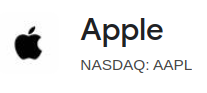

Dans cette partie nous allons prédire le prix à la fermeture de l'action de l'entreprise APPLE (nom de l'action APPL : https://www.google.com/search?q=aapl+price&oq=AAPL&gs_lcrp=EgZjaHJvbWUqBwgEEAAYgAQyCQgAEEUYORiABDIVCAEQLhgKGIMBGMcBGLEDGNEDGIAEMg0IAhAuGK8BGMcBGIAEMgcIAxAAGIAEMgcIBBAAGIAEMgcIBRAAGIAEMgwIBhAAGAoYsQMYgAQyDwgHEAAYChiDARixAxiABDIHCAgQABiABDIMCAkQABgKGLEDGIAE0gEINjQ4MmowajeoAgCwAgA&sourceid=chrome&ie=UTF-8).

Pour se faire nous avons collectés les données allant du 31-01-2018 au 31-01-2020 :

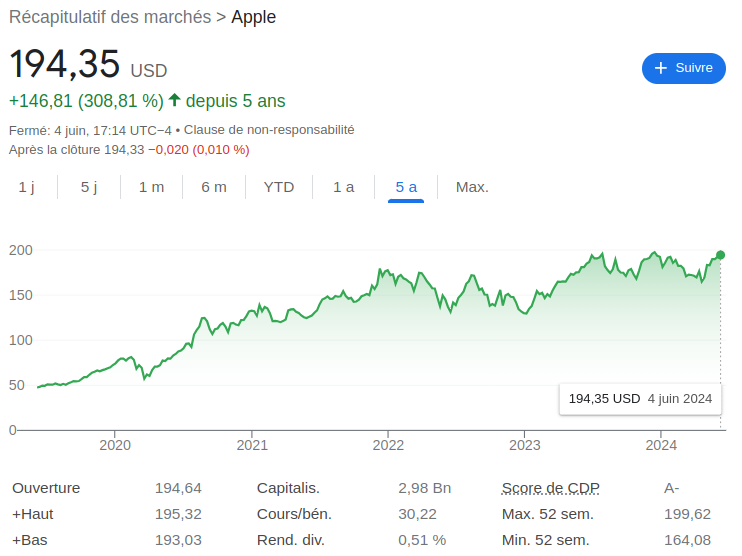


Abordons les termes :

  - **Une action :** C'est une fraction du capital d'une entreprise. Si vous détenez des actions, vous êtes propriétaire d'une partie de la société.
  
  - **Au 4 juin 2024 (hier), une action de APPLE valait 194,35 USD , autrement, si vous achetez action de APPLE vous êtes propriétaire d'une partie de apple.**
  
  (Si l'achat des actions des entreprises vous intéresse, je vous encourage, pour votre culture personnelle, à observer l'action de nvidia sur 5 ans : https://www.google.com/search?q=nvidia+stock+price&oq=nvidia&gs_lcrp=EgZjaHJvbWUqBggCEAAYODIHCAAQABiPAjIYCAEQLhgUGIMBGMcBGIcCGLEDGNEDGIAEMgYIAhAAGDgyDQgDEAAYgwEYsQMYgAQyBggEEEUYOzIKCAUQABixAxiABDINCAYQABiDARixAxiABDIKCAcQABixAxiABDIHCAgQABiABDINCAkQABiDARixAxiABNIBCDI2MjBqMGo5qAIAsAIA&sourceid=chrome&ie=UTF-8 vous observerez par exemple que en 2020, une action de nvidia valait environ 50€ et aujourd'hui elle vaut +1100€, autrement si vous aviez acheté une seule action de nvidia en 2020, aujourd'hui vous aurez au moins gagné 50€, 20 fois (au moins 1150€) mais attention, ceci n'est pas un conseil financier, les expériences passées ne garantissent pas toujours les expériences futures dans un contexte aussi aléatoire que celui-ci!!!)


  - **Les états d'une action :** Le marché de la bourse ne fonctionne pas 24H/24, au court d'une journée une action possède plusieurs états qui sont open, high, low, close, qui représente la valeur de l'action à l'ouverture du marché (généralement le matin), la plus grande valeur atteinte par l'action durant la journée, la plus basse valeur durant la journée et, le valeur de l'action à sa fermeture (comme dans l'image ci-dessus, où une action de apple valait 194,35 USD à 23H59 d'hier).


  **Le but de cette partie est d'apprendre à un algorithme de regression linéaire de type-multivarié, à comprendre l'évolution de l'action de apple à sa fermeture et pour une période déterminée, dans le but de prédire le prix de cette même action pour la période d'après.**



Avec une architecture complexe, nous avons su prédire de manière presque parfaite les bonnes valeurs de l'action à sa fermeture pour la période suivante, nous tenons à souligner que le but ici n'est pas de réaliser quelque chose de parfait mais plutôt, de comprendre à l'aide d'une démarche simplifiée comment prédire des valeurs réelle (faire de laregression) afin d'approximer la réalité.

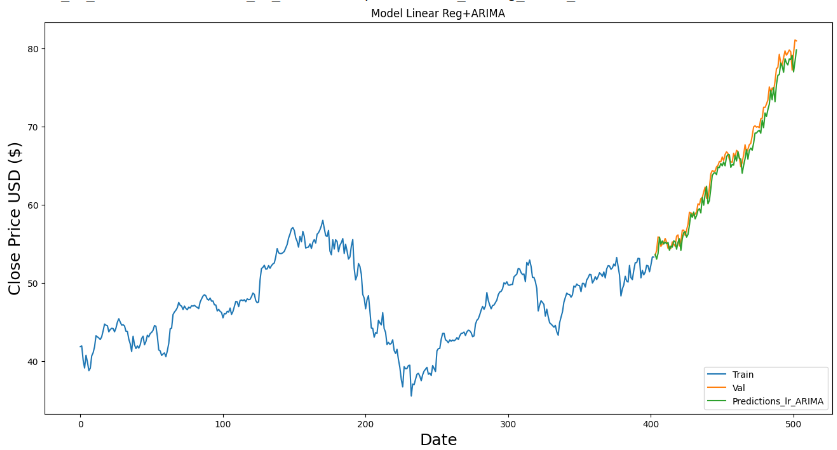

On note :    

-**En bleu :** les valeurs de l'action à sa fermeture et sur lesquelles le modèle a apprit , c'est la période d'avant.

-**En orange :** ce sont les vraies valeurs de l'action à sa fermeture (la réalité) qui concerne la périod ed'après et que l'on veut prédire

-**En vert :** ce sont les valeurs de l'action à la fermeture que le modèle (notre architecture complexe) a prédit .


Quand le vert et l'orange sont proches et ont à peu près par la même forme, on peut affirmer que le modèle a non seulement bien apprit des données en bleu, mais, qu'il est aussi capable de bien prédire.

Ci-desssous, voici un modèle qui a mal apprit sur les données en bleu et où l'écart (l'erreur de prédiction) entre l'orange et le vert sont très remarquables :

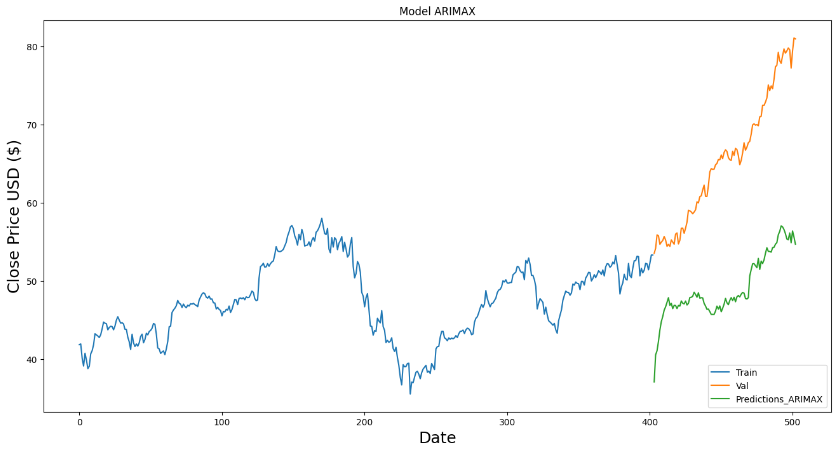

ON PEUT COMMENCER :

nous allons utiliser **SCIKIT-LEARN** , qui est une librairie python qui propose des modèles de machine leanring.

**1) Téléchargez le dataset (jeu de données) APPL_TRENDS et faites-en un dataframe :**

In [24]:
df=pd.read_csv('APPL_TRENDS.csv')

**2) Affichez-le**

In [25]:
df

,Unnamed: 0,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Date.1,Open,High,Low,Close,Adj Close,Volume
0,0,2018-02-01,pleasant weather new year's eve malaria war: g...,0.372279,0.003777,-0.9999,0.173,0.718,0.109,2018-01-31,41.717499,42.110001,41.625000,41.857498,39.802288,129915600
1,1,2018-02-02,flamingos arrive mumbai! lara dutta judge danc...,0.385969,0.051291,-0.9996,0.144,0.739,0.117,2018-02-01,41.792500,42.154999,41.689999,41.945000,39.885490,188923200
2,2,2018-02-03,bollywood stepmothers share beautiful bond ste...,0.427895,0.070942,-0.9999,0.163,0.729,0.108,2018-02-02,41.500000,41.700001,40.025002,40.125000,38.154854,346375200
3,3,2018-02-04,wear many colours: saqib saleem 3 essential fo...,0.411304,0.089719,-0.9998,0.161,0.727,0.113,2018-02-05,39.775002,40.970001,39.000000,39.122501,37.201576,290954000
4,4,2018-02-05,right hair brush hair type rise statement swea...,0.420251,0.062372,-0.9995,0.148,0.731,0.120,2018-02-06,38.707500,40.930000,38.500000,40.757500,38.756306,272975200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,2019-06-14,cyclists go may challenge cyclists go may chal...,0.408077,0.020482,-0.9998,0.165,0.743,0.092,2020-01-24,80.062500,80.832497,79.379997,79.577499,77.960289,146537600
499,499,2019-06-15,father's day gifts ideas 2019: best gadgets bu...,0.398877,0.059602,-0.9998,0.157,0.753,0.090,2020-01-27,77.514999,77.942497,76.220001,77.237503,75.667847,161940000
500,500,2019-06-16,happy fathers day quotes messages status wishe...,0.438045,0.070078,-0.9995,0.147,0.744,0.109,2020-01-28,78.150002,79.599998,78.047501,79.422501,77.808418,162234000
501,501,2019-06-17,translocation saves tress rings death knell? i...,0.405336,0.060550,-0.9998,0.151,0.767,0.082,2020-01-29,81.112503,81.962502,80.345001,81.084999,79.437157,216229200


**3) supprimez la colonne suivante 'Unnamed: 0'**

In [30]:
df = df.drop('', axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           503 non-null    object 
 1   headline_text  503 non-null    object 
 2   Subjectivity   503 non-null    float64
 3   Polarity       503 non-null    float64
 4   Compound       503 non-null    float64
 5   Negative       503 non-null    float64
 6   Neutral        503 non-null    float64
 7   Positive       503 non-null    float64
 8   Date.1         503 non-null    object 
 9   Open           503 non-null    float64
 10  High           503 non-null    float64
 11  Low            503 non-null    float64
 12  Close          503 non-null    float64
 13  Adj Close      503 non-null    float64
 14  Volume         503 non-null    int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 59.1+ KB


**3) Comprenez les données**

Vous avez 15 colonnes, mais nous n'en garderons que 8.

**- Date :** représente les dates spécifique aux jours entre 2018 et 2020

**- headline_text :** Cette colonne contient les textes des articles financiers commentant les actualités du jour, notamment les évolutions en bourse.

Pour convertir les textes en données exploitables par un modèle de machine learning, plusieurs mesures de sentiments ont été calculées à partir de ces textes, ce qui a donné les colonnes suivantes :    

**- Subjectivity :** C'est une mesure de la subjectivité du texte, variant de 0 (complètement objectif) à 1 (complètement subjectif).

**- Polarity :** C'est une mesure de la combinaison globale des émotions positives et négatives dans un texte. La polarité varie de -1 (négatif) à 1 (positif).

**- Compound :** C'est une mesure agrégée des sentiments qui combine toutes les autres mesures de sentiment. Elle varie de -1 (très négatif) à 1 (très positif).

**- Negative :** C'est la proportion de mots négatifs dans le texte.

**- Neutral :** C'est la proportion de mots neutres dans le texte.

**- Positive :** C'est la proportion de mots positifs dans le texte.


Enfin, les colonnes suivantes contiennent des données financières spécifiques pour chaque date :

**- Open :** C'est le prix d'ouverture de l'action pour la date donnée.

**- High :** C'est le prix le plus élevé atteint par l'action au cours de la journée.

**- Low :** C'est le prix le plus bas atteint par l'action au cours de la journée.

**- Close :** C'est le prix de clôture de l'action pour la date donnée.

**- Adj Close :** C'est le prix de clôture ajusté, prenant en compte les événements tels que les dividendes et les scissions d'actions.

**- Volume :** C'est le volume d'échange des actions pour la date donnée.


**4) Ne garder que les colonnes nécesaires**

On va prédire le prix de l'action à sa fermeture (y='Close') et ,
en fonction des faits d'intérêts, qui sont ici représenté par le degré de sentiments des articles finaciers.

In [33]:
Dates = df["Date.1"]

In [ ]:
Dates

In [34]:
df_final = df[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,41.857498,0.372279,0.003777,-0.9999,0.173,0.718,0.109
1,41.945000,0.385969,0.051291,-0.9996,0.144,0.739,0.117
2,40.125000,0.427895,0.070942,-0.9999,0.163,0.729,0.108
3,39.122501,0.411304,0.089719,-0.9998,0.161,0.727,0.113
4,40.757500,0.420251,0.062372,-0.9995,0.148,0.731,0.120
...,...,...,...,...,...,...,...
498,79.577499,0.408077,0.020482,-0.9998,0.165,0.743,0.092
499,77.237503,0.398877,0.059602,-0.9998,0.157,0.753,0.090
500,79.422501,0.438045,0.070078,-0.9995,0.147,0.744,0.109
501,81.084999,0.405336,0.060550,-0.9998,0.151,0.767,0.082


**5) Petite analyse, expliquez ce que vous comprenez de ce graphique ci-dessous :::**







<Axes: >

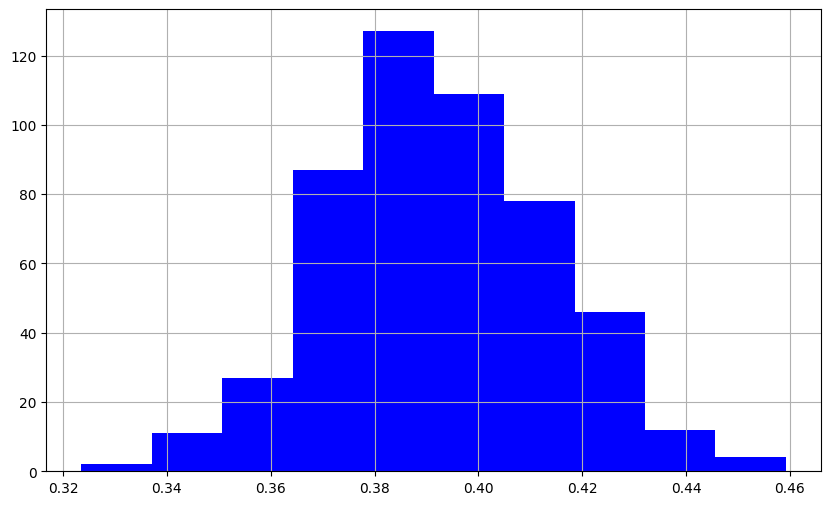

In [37]:
plt.figure(figsize = (10,6))
df_final['Subjectivity'].hist(color = 'blue')

In [35]:
# Votre explication ici




**6) La normalisation MinMax: on va réduire l'échelle de valeur de nos données, on préfaire parfois travailler avec es petite valeur pour faciliter les calculs à la machine**

Historique : voici à quoi ressemble l'entièreté de nos 503 données (close à chaque date entre 2018 et 2020)

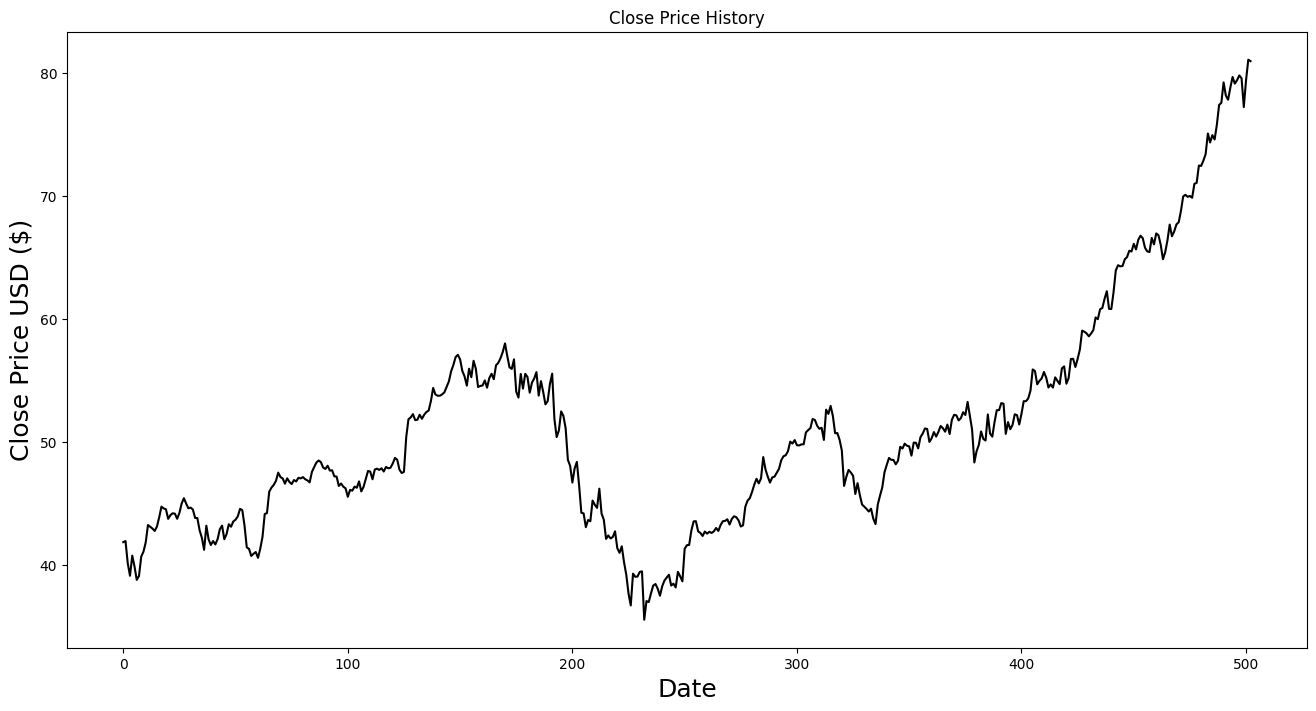

In [59]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(y['Close'], color='black')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [85]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

df_scaled = df_final.copy() # c'est le nom du dataframe des données normalisées

df_scaled[df_final.columns] = scaler.fit_transform(df_final[df_final.columns])

In [86]:
df_scaled

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.138567,0.359335,0.153406,0.00005,0.659341,0.229885,0.484211
1,0.140489,0.460227,0.447414,0.00020,0.340659,0.471264,0.568421
2,0.100522,0.769228,0.569007,0.00005,0.549451,0.356322,0.473684
3,0.078507,0.646950,0.685192,0.00010,0.527473,0.333333,0.526316
4,0.114411,0.712888,0.515980,0.00025,0.384615,0.379310,0.600000
...,...,...,...,...,...,...,...
498,0.966895,0.623168,0.256775,0.00010,0.571429,0.517241,0.305263
499,0.915509,0.555362,0.498839,0.00010,0.483516,0.632184,0.284211
500,0.963492,0.844033,0.563660,0.00025,0.373626,0.528736,0.484211
501,1.000000,0.602966,0.504707,0.00010,0.417582,0.793103,0.200000


In [87]:
# vosu devez obtenir ce résultat
df_scaled

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.138567,0.359335,0.153406,0.00005,0.659341,0.229885,0.484211
1,0.140489,0.460227,0.447414,0.00020,0.340659,0.471264,0.568421
2,0.100522,0.769228,0.569007,0.00005,0.549451,0.356322,0.473684
3,0.078507,0.646950,0.685192,0.00010,0.527473,0.333333,0.526316
4,0.114411,0.712888,0.515980,0.00025,0.384615,0.379310,0.600000
...,...,...,...,...,...,...,...
498,0.966895,0.623168,0.256775,0.00010,0.571429,0.517241,0.305263
499,0.915509,0.555362,0.498839,0.00010,0.483516,0.632184,0.284211
500,0.963492,0.844033,0.563660,0.00025,0.373626,0.528736,0.484211
501,1.000000,0.602966,0.504707,0.00010,0.417582,0.793103,0.200000


In [88]:
# Récupérer la variable cible
y = df_scaled.filter(['Close'])

In [89]:
# affichez y ici


que constatez vous ---->

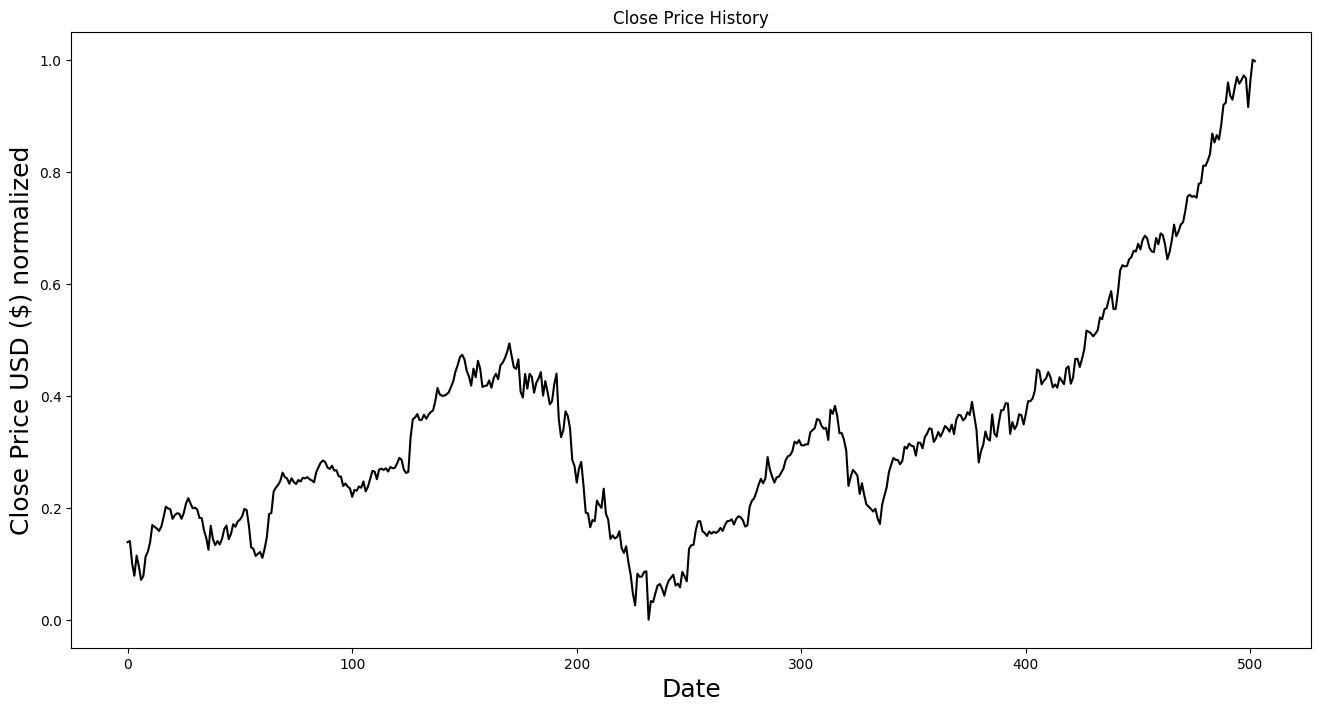

In [93]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(y['Close'], color='black')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) normalized', fontsize=18)
plt.show()

vous voyez que l'échelle de valeurs de nos données a changé

In [94]:
# Récupérer les caractéristique du problème
X = df_scaled.filter(['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive'])

In [95]:
# affichez X ici


In [96]:
# 80 % c'est la taille des données sur les quelles notre modèle va apprendre
training_data_len = int(np.ceil(df_scaled.shape[0] * .8))
training_data_len

403

on part de 0 à 402 (403 lignes pour les train data)

In [97]:
# puisque nous avons 503 lignes, la différence entre 403 et 503 nosu donne les 20% restant, qui constitue nos données de test

503-403

100

on part de 403 à 502 (100 lignes pour les test data)

On aura donc :     

* Pour la phase d'apprentissage (entrainement du modèle) : les 403 premières lignes de nos données qui vont constituer les données d'apprentissage pour notre modèle et,

* Pour la phase de test (évaluation des perfomances du modèles) : les 100 dernières lignes restantes, qui seront nos données de test qui nous pemrettront d'évaluer le modèle

**7) Découpage des données en TRAIN et TEST**

On va découper ces données en données d'apprentissage et données de test.

In [98]:
# on découpe en donnée d'app (train)
X_train, y_train = X.iloc[0:training_data_len,:] , y.iloc[0:training_data_len,:]

In [99]:
X_train.shape

(403, 6)

expliquez la taille de X_train ->

In [100]:
 # on découpe en donnée de test
X_test, y_test = X.iloc[training_data_len:,:] , y.iloc[training_data_len:,:]

In [101]:
X_test.shape

(100, 6)

expliquez la taille de X_test ->

In [ ]:
# affichez X_train et X_test


**8) Utilisation du modèle de regression linéaire de scikit-learn pour l'apprentissage automatique sur les données**

Faire une association entre les variables et leur nommenclature afin de ressortire la formule mathématique du modèle :

'Subjectivity' : X1

'Polarity' : X2

'Compound' : X3

'Negative' : X4

'Neutral' : X5

'Positive' : X6

In [102]:
from sklearn.linear_model import LinearRegression #importez la librairie scikit-learn

In [103]:
# isntanciez la classe LinearRegression pour récupérer l'algorithme d'IA
linear_model = LinearRegression()

Etant donné notre problème qui est multilinéaire, son alogirthme d'IA se représente de cette façon :    

y = a X1 + b X2 + c X3 + d X4 + e X5 + f X6 + g

où g est représente le biais (si il existe) !

n'oubliez pas que y sera fonciton de x, autrement pour prédire une Close, on aura beosin des 6 variables X_i et du biais, si ce denrier n'existe pas, il sera égale à 0

In [104]:
# entrainez votre tout premier modèle en utilisant les données d'apprentissages (train data)!!!

linear_model.fit(X_train, y_train)

LinearRegression()

Bravo, votre modèle est entrainé !!!!!

considérant maintenant a, b, c, d, e, f, les coefficients de l'algorithme, qui sont des paramètres que le modèle a su déterminer après entrainement.

In [105]:
params = linear_model.coef_[0]

In [106]:
params

array([-0.03957042, -0.04188287,  0.09909599,  2.08648807,  2.0320773 ,
        2.11974438])

In [107]:
g = linear_model.intercept_

In [108]:
g

array([-2.58669554])

Complétez les lignes suivantes

In [109]:
a = # TODO
b = # TODO
c = # TODO
d = # TODO
e = # TODO
f = # TODO

In [110]:
print(f"Relation mathématique: \n y = ({a}) X1 + ({b}) X2 + {c} X3 + {d} X4 + {e} X5 + {f} X6 + ({g[0]})")

Relation mathématique: 
 y = (-0.03957041925247248) X1 + (-0.04188286991721412) X2 + 0.09909598948666619 X3 + 2.0864880725550985 X4 + 2.0320772984539532 X5 + 2.1197443823715028 X6 + (-2.5866955416569657)


Autrement

y = f(X1,X2,X3,X4,X5,X6)

y = Close

Close = f(Subjectivity, Polarity, Compound, Negative, Neutral, Positive)

**Close = (-0.03957041925247248) * Subjectivity + (-0.04188286991721412) * Polarity + 0.09909598948666619 * Compound + 2.0864880725550985 * Negative + 2.0320772984539532 * Neutral + 2.1197443823715028 * Positive + (-2.5866955416569657)**

Vous avez là le modèle d'IA !!!

**9) Maintenant que vous avez un modèle qui a apprit sur les données, utilisez ce modèle de regression linéaire de scikit-learn pour prédire la valeur de fermeture des données de test, c'est-à-dire, des données sur lesquelles le modèle n'a pas apprit**

In [150]:
y_pred = linear_model.predict(X_test)

Voci nos prédictions :

In [119]:
y_pred

array([[0.29401391],
       [0.27633826],
       [0.27530492],
       [0.27906851],
       [0.25392866],
       [0.28703166],
       [0.27661732],
       [0.28029226],
       [0.28045815],
       [0.26715603],
       [0.25503239],
       [0.2368343 ],
       [0.31584888],
       [0.26791468],
       [0.2678982 ],
       [0.25646307],
       [0.27371642],
       [0.26580384],
       [0.28137038],
       [0.27967022],
       [0.26423921],
       [0.27150694],
       [0.28843578],
       [0.26232461],
       [0.26986131],
       [0.26972291],
       [0.21957483],
       [0.22918639],
       [0.29534134],
       [0.2824569 ],
       [0.26701488],
       [0.25464145],
       [0.23973972],
       [0.27898462],
       [0.27882006],
       [0.26215005],
       [0.3259851 ],
       [0.32812338],
       [0.29283901],
       [0.26423868],
       [0.26186562],
       [0.29242334],
       [0.23023371],
       [0.26136958],
       [0.26300117],
       [0.27732924],
       [0.26852905],
       [0.267

Voici la réalité :

In [113]:
y_test

,Close
403,0.395169
404,0.409058
405,0.446884
406,0.444139
407,0.420313
...,...
498,0.966895
499,0.915509
500,0.963492
501,1.000000


Vous avez les 100 vraies valeurs de closes (pour les données de test) et les 100 valeurs rpédites de closes, pour les mêmes données de test

Observons les 5 premières valeurs :

In [116]:
y_pred[0:5] , y_test.head()

(array([[0.29401391],
        [0.27633826],
        [0.27530492],
        [0.27906851],
        [0.25392866]]),
         Close
 403  0.395169
 404  0.409058
 405  0.446884
 406  0.444139
 407  0.420313)

On peut observer des différences au niveau des valeurs, mais représentons d'abord graphiquement le résultat obtenu et la réalité :

convertir d'abord le format de y_pred en dataframe :

In [151]:
y_pred_flat = y_pred.flatten()

In [152]:
y_pred = pd.DataFrame({"Close_predits":list(y_pred_flat)},index=y_test.index)

In [153]:
y_pred

,Close_predits
403,0.294014
404,0.276338
405,0.275305
406,0.279069
407,0.253929
...,...
498,0.268334
499,0.266397
500,0.236724
501,0.275193


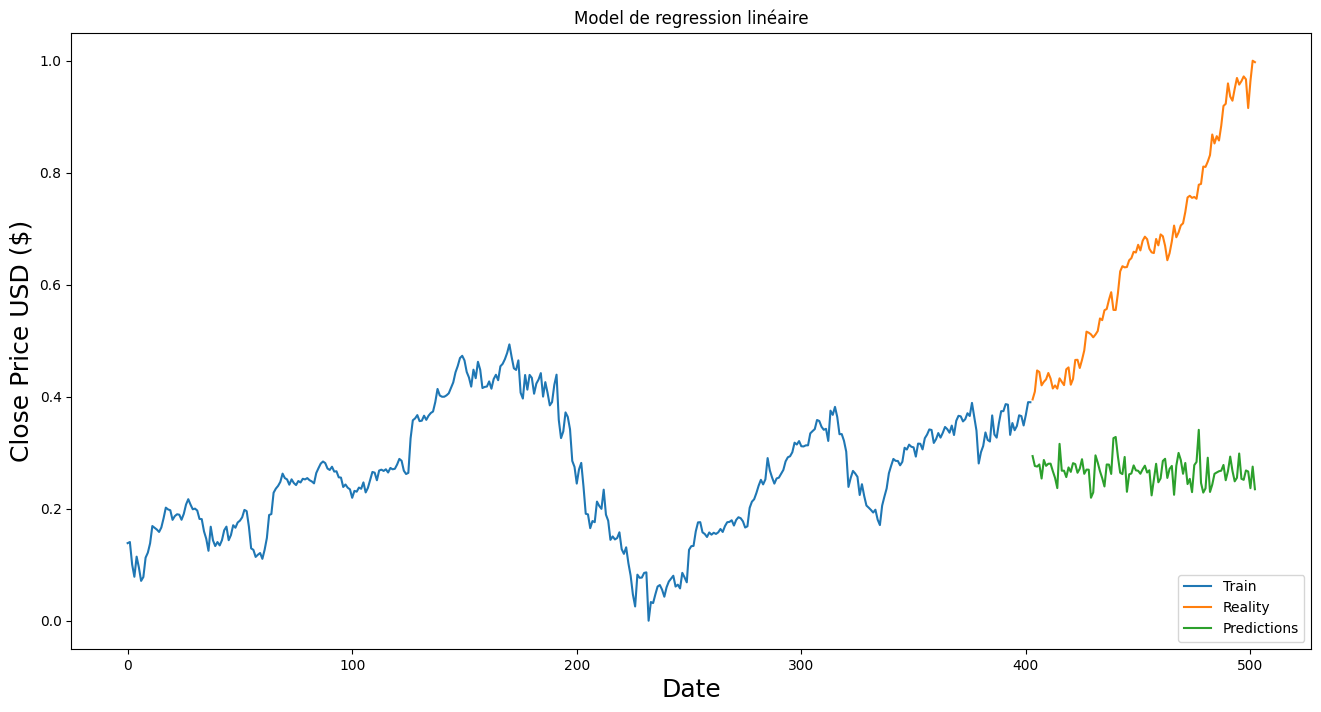

In [155]:
plt.figure(figsize=(16,8))
plt.title('Model de regression linéaire')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_train['Close'])
plt.plot(y_test['Close'])
plt.plot(y_pred['Close_predits'])
plt.legend(['Train', 'Reality', 'Predictions'], loc='lower right')
plt.show()

Critique des résultats :

le modèle n'a pas bien apprit, car les valeurs prédites (en vert), sont très éloignées des valeurs réelles (orange).

On pourrait bien améliorer ces données, mais encore une fois le but ici c'est de comprendre et d'être en mesure d'expliquer ce que vous avez appris, en consolidant théorie et rpatique de ce que nous avons vu en cours.

Concernant les techniques d'améliorations, elles vont seront dispensés dans un module avancé, en classe supérieur.


**Sinon ... BONUS, vous pouvez essayer de propose une solution qui puisse donne run bon résultat.**

10) Evaluation : utilisation des métriques de calcul de l'erreur

La critique réalisé ci-haut, est ce que l'on appelle une analyse QUALITATIVE des résultats obtenus, suaf que cela ne suffit pas, en apprentissage (IA), nous devons aussi réaliser une analyse QUANTITATIVE afin de mesure la qualité d'erreur réalisé par le modèle.


Dans le cas de la prédiction de type regression, on fait souvent recourt à la MSE (Mean Squared Error) qui est l'erreur moyenne réalisé par le modèle sur l'ensemble des données de test (à la prédiction).

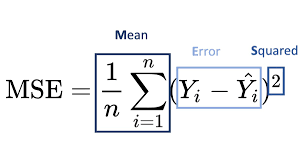

In [125]:
from sklearn import metrics

In [156]:
mse = metrics.mean_squared_error(y_test, y_pred)

print("Modèle de regression linéaire MSE: ",mse)

Modèle de regression linéaire MSE:  0.18696323523993702


Il y a aussi la RMSE, qui est la racine carrée de la MSE :

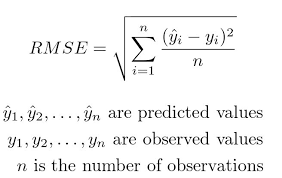

In [157]:
rmse = np.sqrt(mse)
print("Modèle de regression linéaire RMSE: ",rmse)

Modèle de regression linéaire RMSE:  0.43239245511449087


In [174]:
df_results = pd.DataFrame({
                            "Days":pd.DataFrame(Dates).loc[training_data_len:,"Date.1"],
                            "Closes Réelles":y_test["Close"],
                            "Closes prédites":list(y_pred["Close_predits"])
                            })

In [175]:
df_results

,Days,Closes Réelles,Closes prédites
403,2019-09-09,0.395169,0.294014
404,2019-09-10,0.409058,0.276338
405,2019-09-11,0.446884,0.275305
406,2019-09-12,0.444139,0.279069
407,2019-09-13,0.420313,0.253929
...,...,...,...
498,2020-01-24,0.966895,0.268334
499,2020-01-27,0.915509,0.266397
500,2020-01-28,0.963492,0.236724
501,2020-01-29,1.000000,0.275193




> **C'est la fin .**



Ce qui suit n'est que l'explication des résultats que j'ai personnellement obtenu.

# Ci desosus, un exmeple de notre évaluation (complexe sur 6 modèles et à l'aide de 4 métriques). cela concerne els 100 données de test.

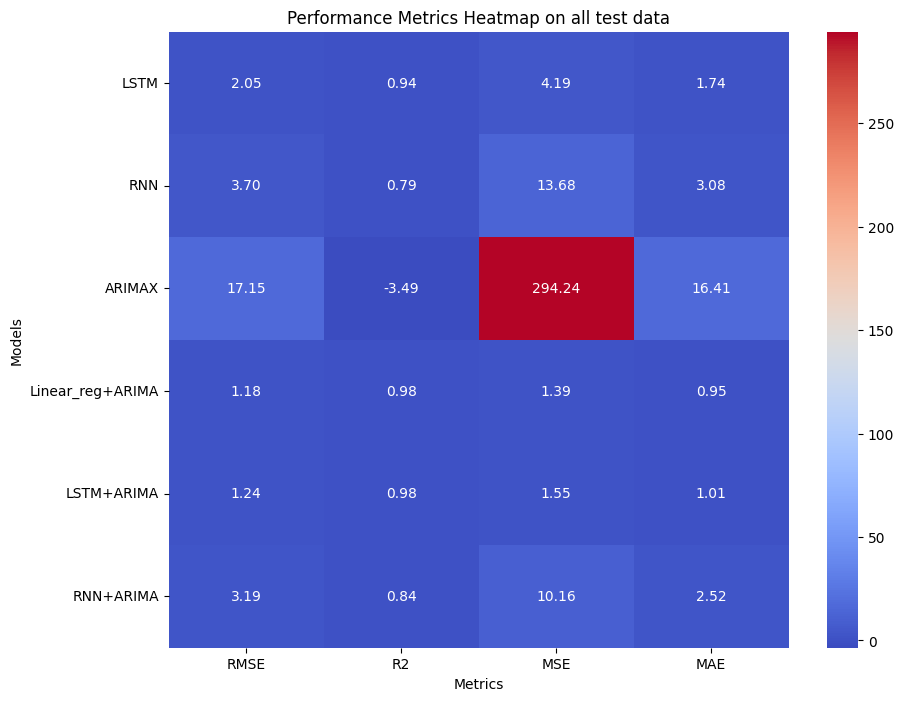

In [ ]:
df_metrics.set_index('Model', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_metrics, annot=True, cmap="coolwarm", fmt=".2f")


plt.title('Performance Metrics Heatmap on all test data')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

# Ci-dessous, vous avez un exemple d'une évaluation sur ce qu'on appelle une fenêtre, c'est une partie des prédictions, ce qu'on fait c'est zoomer dans l'espace afin de mieux interpreter les résultats !

Dans notre cas complexes, nous avions comparés 6 modèles !!!

et l'image suivant présente l'analyse sur les 10 premiers jours prédits (403 à 413) !!!

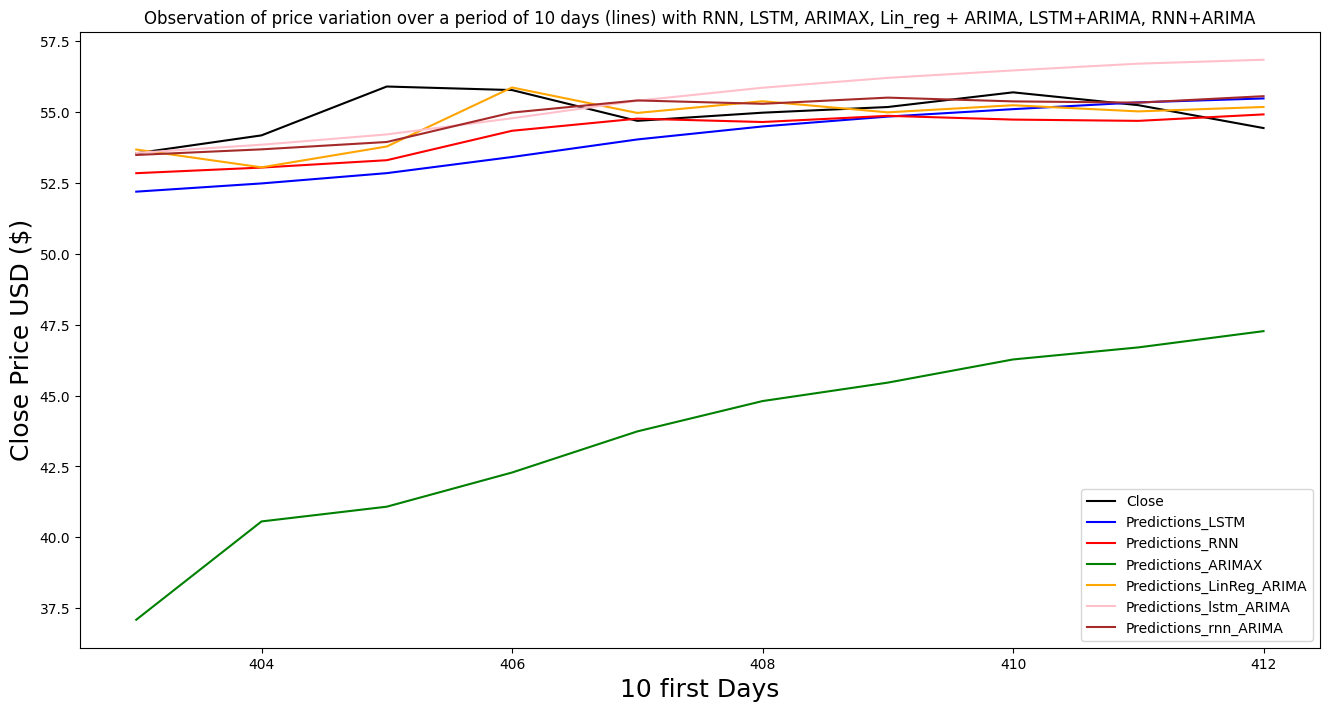

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Observation of price variation over a period of 10 days (lines) with RNN, LSTM, ARIMAX, Lin_reg + ARIMA, LSTM+ARIMA, RNN+ARIMA')
plt.xlabel('10 first Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid_lstm['Close'][0:10], color='black', label='Close')

plt.plot(vl['Predictions_LSTM'], color='blue', label='Predictions_LSTM')
plt.plot(vr['Predictions_RNN'], color='red', label='Predictions_RNN')
plt.plot(va['Predictions_SARIMAX'], color='green', label='Predictions_ARIMAX')
plt.plot(vlra['Predictions_lr_ARIMA'], color='orange', label='Predictions_LinReg_ARIMA')
plt.plot(vla['Predictions_lstm_ARIMA'], color='pink', label='Predictions_lstm_ARIMA')
plt.plot(vra['Predictions_rnn_ARIMA'], color='brown', label='Predictions_rnn_ARIMA')

plt.legend(loc='lower right')
plt.show()